In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import seaborn as sns
from train_test_divide import extract_normal, extract_spammers_scrapers
import os

In [24]:
path = os.path.dirname(os.path.abspath("__file__"))
dir = path.replace('notebooks', 'csv_files')
os.chdir(dir)

df_anomaly_train = pd.read_csv('train.csv')
df_anomaly_test = pd.read_csv('test.csv')

anomaly_inputs = ['request_freq', 'avg_tokens', 'longest_consec', 'var_score', 'sequence_time']
#anomaly_inputs = ['avg_tokens', 'var_score', 'longest_consec']

In [23]:
model_if = IsolationForest(contamination=0.002, random_state=42)
model_if.fit(df_anomaly_train[anomaly_inputs])

c:\Users\vhage\Documents\Skolarbete\Exjobb\request-analyzer-model\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.002, random_state=42)

In [15]:
#Code for checking how many spammers and scarpers that are present in test dataset
df_test = pd.read_csv('test.csv')
df_test_spam = extract_spammers_scrapers(df_test)
df_test_spam

,request_freq,avg_tokens,longest_consec,var_score,sequence_time,user
0,0.867778,1.0,7.0,0.000078,7.810,user-1003
1,1.758222,1.0,4.0,0.000055,15.824,user-1003
2,3.010556,1.0,4.0,0.000050,27.095,user-1003
3,1.561889,1.0,6.0,0.000055,14.057,user-1003
4,1.896667,1.0,6.0,0.000065,17.070,user-1003
...,...,...,...,...,...,...
13372,3.063000,1.0,4.0,0.000039,24.504,user-1004
13373,0.520000,1.0,9.0,0.000077,4.160,user-1004
13374,1.581250,1.0,6.0,0.000051,12.650,user-1004
13375,2.155500,1.0,3.0,0.000033,17.244,user-1004


In [16]:
#Code for checking how many normal users that are present in test dataset
df_test_normal = extract_normal(df_test, df_test_spam)
df_test_normal

,request_freq,avg_tokens,longest_consec,var_score,sequence_time,user
13377,335.892889,0.181818,3.0,0.000023,3023.036,user-65
13378,4.060333,1.000000,3.0,0.000032,36.543,user-65
13379,2103.826667,0.030769,2.0,0.000023,18934.440,user-65
13380,2.648444,1.000000,2.0,0.000023,23.836,user-65
13381,0.761556,1.000000,2.0,0.000032,6.854,user-65
...,...,...,...,...,...,...
16048,1.386556,1.000000,3.0,0.000029,12.479,user-186
16049,45.295375,1.000000,2.0,0.000022,362.363,user-147
16050,2593.905375,0.042857,2.0,0.000018,20751.243,user-754
16051,51.212250,1.000000,3.0,0.000018,409.698,user-641


In [25]:
df_anomaly_test['anomaly_score'] = model_if.decision_function(df_anomaly_test[anomaly_inputs])
df_anomaly_test['anomaly'] = model_if.predict(df_anomaly_test[anomaly_inputs])

#This dataframe will only include anomaly score and anomaly label
df_anomaly_score = df_anomaly_test.loc[:,['anomaly_score', 'anomaly']]
df_anomaly_score['user'] = df_anomaly_test['user']
df_a = df_anomaly_score.loc[df_anomaly_score['anomaly']==-1] 
print(df_a)

"""
Test result:
Using all features:
    Sequence length: 15 with 8917 anomalies
        True positives = 2059
        False positives = 4
        True negatives = 1811
        False negatives = 6858

    Sequence length: 25 with 5351 anomalies
        True positives = 2011
        False positives = 11
        True negatives = 1128
        False negatives = 3340

    Sequence length: 35 with 3822 anomalies
        True positives = 2455
        False positives = 0
        True negatives = 835
        False negatives = 1367

    Sequence length: 45 with 2973 anomalies
        True positives = 1972
        False positives = 0
        True negatives = 672
        False negatives = 1001 

    Sequence length: 55 with 2433 anomalies
        True positives = 2246
        False positives = 0
        True negatives = 567
        False negatives = 187        

    Sequence length: 65 with 2060 anomalies
        True positives = 2060
        False positives =  0
        True negatives = 497
        False nagtives = 0   
"""



       anomaly_score  anomaly       user
0          -0.031565       -1  user-1003
1          -0.057706       -1  user-1003
2          -0.057706       -1  user-1003
3          -0.035638       -1  user-1003
4          -0.035638       -1  user-1003
...              ...      ...        ...
16048      -0.057706       -1   user-754
16049      -0.057706       -1   user-754
16050      -0.057706       -1   user-641
16051      -0.040854       -1   user-641
16052      -0.038176       -1   user-715

[16050 rows x 3 columns]


'\nTest result:\nUsing all features:\n    Sequence length: 15 with 8917 anomalies\n        True positives = 2059\n        False positives = 4\n        True negatives = 1811\n        False negatives = 6858\n\n    Sequence length: 25 with 5351 anomalies\n        True positives = 2011\n        False positives = 11\n        True negatives = 1128\n        False negatives = 3340\n\n    Sequence length: 35 with 3822 anomalies\n        True positives = 2455\n        False positives = 0\n        True negatives = 835\n        False negatives = 1367\n\n    Sequence length: 45 with 2973 anomalies\n        True positives = 1972\n        False positives = 0\n        True negatives = 672\n        False negatives = 1001 \n\n    Sequence length: 55 with 2433 anomalies\n        True positives = 2246\n        False positives = 0\n        True negatives = 567\n        False negatives = 187        \n\n    Sequence length: 65 with 2060 anomalies\n        True positives = 2060\n        False positives =  0\n

In [26]:
spam = extract_spammers_scrapers(df_a)
print(spam.shape[0])

normal = extract_normal(df_a, spam)
print(normal.shape[0])

13377
2673


In [18]:
#To check which users thar are flagged as anomalies
print(set(df_a['user'].to_list()))
#print(df_anomaly_test.loc[df_anomaly_test['user']== ' user-693'])

{'user-1005', 'user-1004', 'user-584', 'user-578', 'user-397', 'user-460', 'user-603', 'user-790', 'user-1003'}


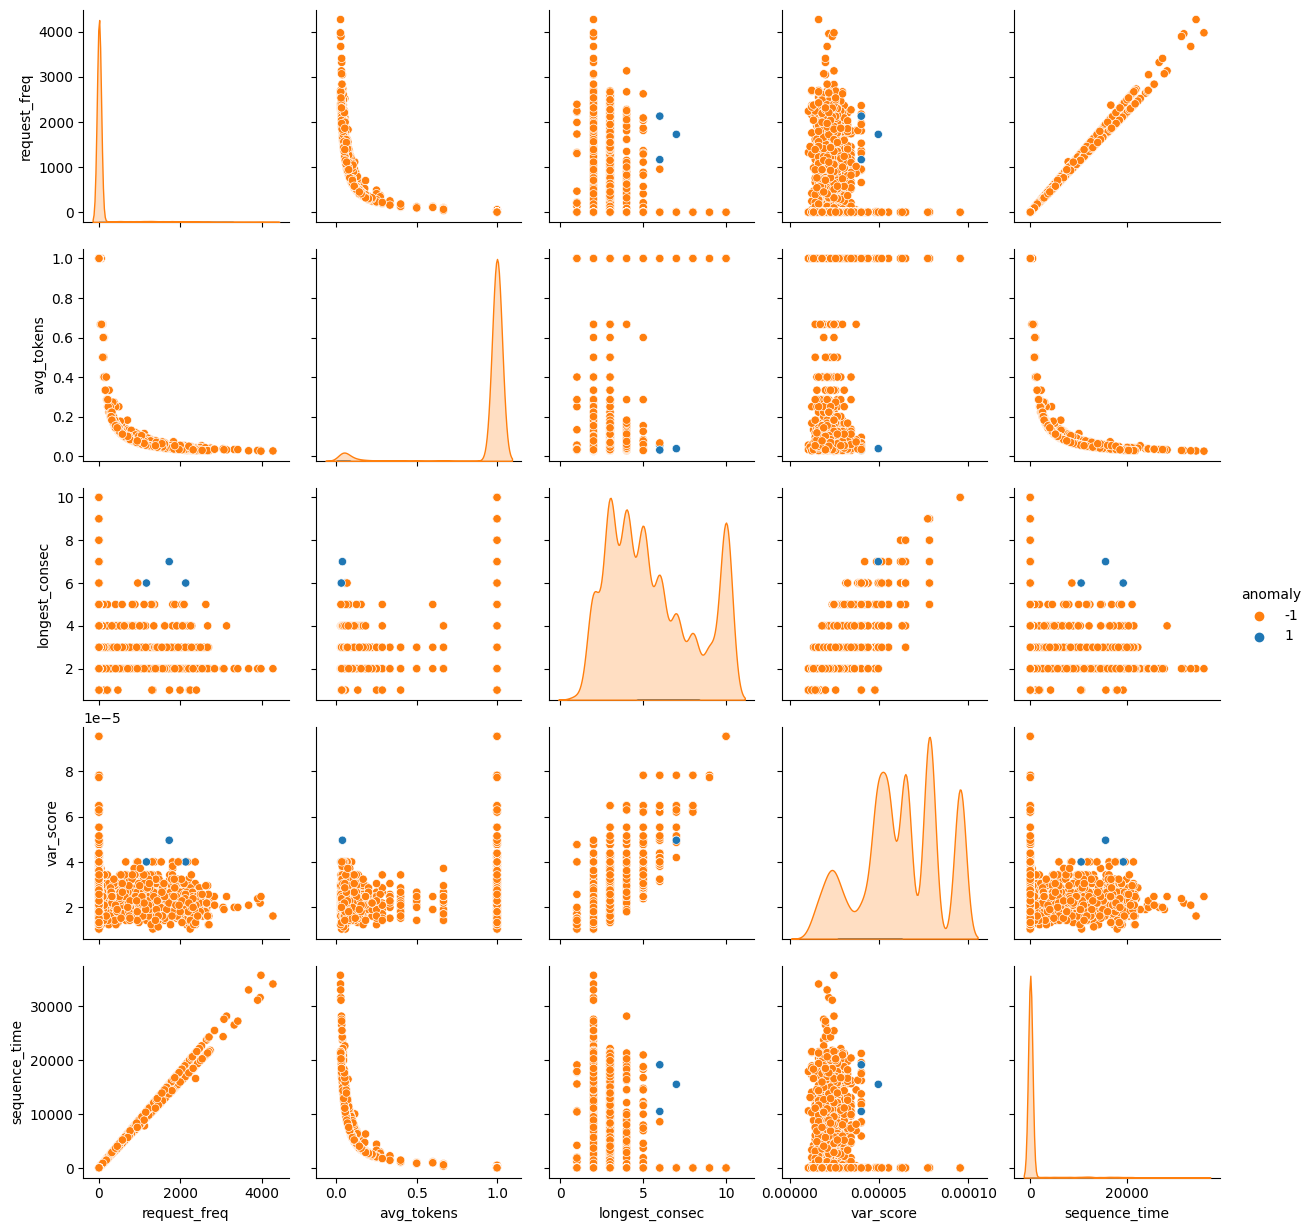

In [27]:
#Plots showcasing the outliers detected by isolation forest
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_anomaly_test, vars=anomaly_inputs, hue='anomaly', palette=palette)